<a href="https://colab.research.google.com/github/RuslanFF1968/Pioneer/blob/main/Image_recognition_using_the_NN_created_by_genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cifar10 image recognition using the NN created by genetic algorithm

#Data conditioning

In [ ]:
from keras.datasets import cifar10               # Загружаем базу cifar10
import random as random                          # Генератор рандомных чисел
from keras.optimizers import Adam                # Оптимизатор Adam
from tensorflow.keras.models import Sequential   # Сеть прямого распространения

# Базовые слои для свёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import utils               # Используем для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображений
from google.colab import files                   # Для загрузки своей картинки
import numpy as np                               # Библиотека работы с массивами
import matplotlib.pyplot as plt                  # Для отрисовки графиков
from PIL import Image                            # Для отрисовки изображений
import time                                      # Для подсчета времени



```
# This is formatted as code
```

**Data upload**

In [ ]:
# Загружаем базу
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

# Задаем batch_size
batch_size = 128

# Загружаем названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

# Превращаем выходы сетей в формат  one hot encoding
y_train10 = utils.to_categorical(y_train10, 10)

# Делаем решейп
x_train10 = x_train10.reshape(x_train10.shape[0], 32, 32, 3)
x_test10 = x_test10.reshape(x_test10.shape[0], 32, 32, 3)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 385s 2us/step


Displaying a selectable picture


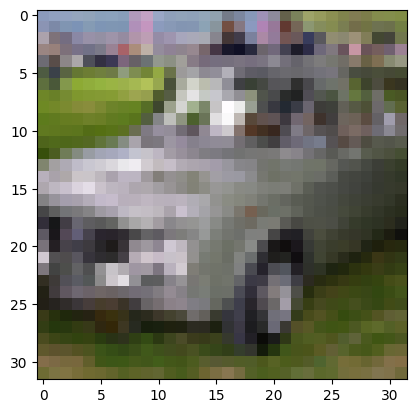

In [ ]:
# Выводим для примера картинку
n = 44

# Загружаем картинку из массива и отрисовываем в цветном формате - RGBA
plt.imshow(Image.fromarray(x_train10[n]).convert('RGBA'))
plt.show()

In [ ]:
# Выводим пример картинки в цифрах, как она хранится в памяти
print(x_train10[44,1,1])

[124 137 167]


In [ ]:
print(x_train10.shape)
print(x_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


#Hand-made NN

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 186s 588ms/step - accuracy: 0.1741 - loss: 4.7366 - val_accuracy: 0.4049 - val_loss: 1.6261
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 192s 557ms/step - accuracy: 0.4335 - loss: 1.5477 - val_accuracy: 0.5065 - val_loss: 1.3685
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 203s 560ms/step - accuracy: 0.5135 - loss: 1.3581 - val_accuracy: 0.5295 - val_loss: 1.3164
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 181s 579ms/step - accuracy: 0.5465 - loss: 1.2701 - val_accuracy: 0.5853 - val_loss: 1.1568
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 578ms/step - accuracy: 0.5880 - loss: 1.1601 - val_accuracy: 0.6152 - val_loss: 1.0893
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 183s 585ms/step - accuracy: 0.6181 - loss: 1.0795 - val_accuracy: 0.6197 - val_loss: 1.0603
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 181s 580ms/step - accuracy: 0.6389 - loss: 1.0210 - val_accuracy: 0.6062 - val_loss: 1.1322
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 585ms/step - accuracy: 0.6481 -

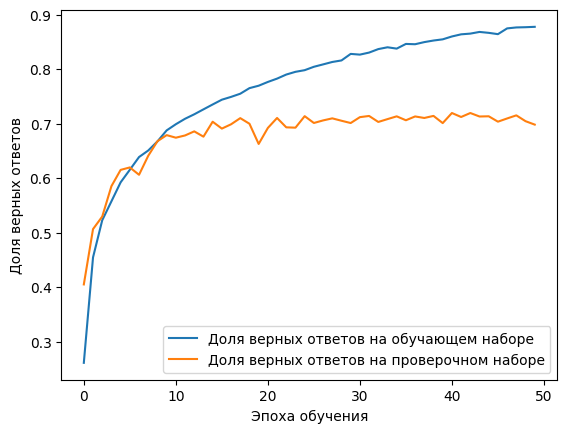

In [ ]:
# Создаем последовательную модель
model = Sequential()

# Первый сверточный слой
model.add(Conv2D(32, (7, 7), input_shape=(32, 32, 3), padding='same', activation='relu'))

# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(4, 4)))

# Слой регуляризации Dropout
#model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))

# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())

# Полносвязный слой для классификации
model.add(Dense(64, activation='relu'))

# Слой регуляризации Dropout
#model.add(Dropout(0.5))

# Выходной полносвязный слой
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train10,
                    y_train10,
                    batch_size=batch_size,
                    epochs=50,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Best epoch precision 71 %

#Architecture selection using Genetic Algorithms

In [ ]:
# Создаём сеть (net - список параметров)
def createConvNet(net):

  model = Sequential()             # Создаем модель Sequential

  makeFirstNormalization = net[0]  # Делаем ли нормализацию в начале
  firstConvSize = 32               # Размер первого свёрточного слоя
  firstConvKernel = net[2]         # Ядро первого свёрточного слоя
  activation0 = net[3]             # Функция активации входного слоя
  makeMaxPooling0 = net[4]         # Делаем ли maxpooling для нулевого слоя
  maxPoolingSize0 = net[5]         # Размер MaxPooling

  makeSecondConv = net[6]          # Делаем ли второй свёрточный слой
  secondConvSize = 2 ** net[7]     # Размер второго свёрточного слоя
  secondConvKernel = net[8]        # Ядро второго свёрточного слоя
  makeMaxPooling1 = net[9]         # Делаем ли MaxPooling
  maxPoolingSize1 = net[10]        # Размер MaxPooling
  activation1 = net[11]            # Функция активации

  makeThirdConv = net[12]          # Делаем ли третий свёрточный слой
  thirdConvSize = 2 ** net[13]     # Размер третьего свёрточного слоя
  thirdConvKernel = net[14]        # Ядро третьего свёрточного слоя
  makeMaxPooling2 = net[15]        # Делаем ли MaxPooling
  maxPoolingSize2 = net[16]        # Размер MaxPooling
  activation2 = net[17]            # Функция активации

  activation3 = net[18]            # Функция активации для
  activation4 = net[19]            # Функция активации для последнего слоя

  makeSecondNormalization = net[20] # Делаем ли финальную нормализацию
  denseSize = 2 ** net[21]          # Размер полносвязного слоя
  droppout = net[22]                # Dropout между слоями

  activation_list = ['linear','relu','tanh','softmax','sigmoid']

  if (makeFirstNormalization!=0):   # Если делаем нормализацию вначале

    # Добавляем слой BatchNormalization
    model.add(BatchNormalization(input_shape=(32, 32, 3)))

    # Добавляем Conv1D-слой с firstConvSize нейронами и ядром (firstConvKernel)
    model.add(Conv2D(firstConvSize, firstConvKernel, activation=activation_list[activation0], padding='same'))
  else:

    # Добавляем Conv1D-слой с firstConvSize нейронами и ядром (firstConvKernel)
    model.add(Conv2D(firstConvSize, firstConvKernel, input_shape=(32, 32, 3), activation=activation_list[activation0], padding='same'))

  if makeMaxPooling0!=0:            # Если делаем maxpooling
    model.add(MaxPooling2D(maxPoolingSize0))

  if (droppout!=0):                 # Если добавляем Dropout
    model.add(Dropout(0.3))


  if (makeSecondConv!=0):           # Если делаем второй свёрточный слой
    # Добавляем Conv1D-слой с secondConvSize нейронами и ядром (secondConvKernel)
    model.add(Conv2D(secondConvSize, secondConvKernel, activation=activation_list[activation1], padding='same'))

    if (makeMaxPooling1!=0):        # Если делаем MaxPooling
      # Добавляем слой MaxPooling1D с размером (maxPoolingSize)
      model.add(MaxPooling2D(pool_size=maxPoolingSize1))

  if (droppout!=0):                 # Если добавляем Dropout
    model.add(Dropout(0.3))

  if (makeThirdConv!=0):            # Если делаем второй свёрточный слой
    # Добавляем Conv1D-слой с secondConvSize нейронами и ядром (secondConvKernel)
    model.add(Conv2D(thirdConvSize, thirdConvKernel, activation=activation_list[activation2], padding='same'))

    if (makeMaxPooling2!=0):        # Если делаем MaxPooling

      # Добавляем слой MaxPooling1D с размером (maxPoolingSize, maxPoolingSize)
      model.add(MaxPooling2D(pool_size=maxPoolingSize2))

  if (droppout!=0):                 # Если добавляем Dropout
    model.add(Dropout(0.3))

  if (makeSecondNormalization!=0):  # Если делаем финальную нормализацию
    model.add(BatchNormalization()) # Добавляем слой BatchNormalization

  model.add(Flatten())              # Добавляем слой Flatten

  # Добавляем слой Dense с denseSize нейронами
  model.add(Dense(denseSize, activation=activation_list[activation3]))

  # Добавляем Dense-слой с softmax-активацией и 10 нейронами
  model.add(Dense(10, activation=activation_list[3]))

  return model                      # Возвращаем модель

'''
  Функция вычисления результата работы сети

'''

def evaluateNet(net, ep, verb):
  val = 0
  time.time()
  model = createConvNet(net) # Создаем модель createConvNet

  # Компилируем сеть
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Обучаем сеть на данных cifar10
  history = model.fit(x_train10,
                      y_train10,
                      batch_size=256,
                      epochs=50,
                      validation_split=0.2,
                      verbose=1)

  val = history.history["val_accuracy"][-1] # Возвращаем точность на проверочной выборке с последней эпохи
  return val, model                         # Возвращаем точность

'''

  Функция создания списка случайных параметров

'''

def createRandomNet():
  net = []
  net.append(random.randint(0,1)) # Делаем или нет нормализацию
  net.append(random.randint(4,9)) # Первый свёрточный слой от 16 до 512 нейронов
  net.append(random.randint(2,5)) # Ядро первого свёрточного слоя от 2 до 5
  net.append(random.randint(0,4)) # Функция активации первого слоя
  net.append(random.randint(0,1)) # Делаем ли MaxPooling
  net.append(random.randint(2,3)) # Размер MaxPooling


  net.append(random.randint(0,1)) # Делаем ли еще сверточный слой
  net.append(random.randint(4,9)) # Второй свёрточный слой от 16 до 512 нейронов
  net.append(random.randint(2,5)) # Ядро второго свёрточного слоя от 3 до 5
  net.append(random.randint(0,1)) # Делаем ли MaxPooling
  net.append(random.randint(2,3)) # Размер MaxPooling
  net.append(random.randint(0,4)) # Функция активации второго слоя

  net.append(random.randint(0,1)) # Делаем ли еще сверточный слой
  net.append(random.randint(4,9)) # Третий свёрточный слой от 16 до 512 нейронов
  net.append(random.randint(3,9)) # Ядро третьего свёрточного слоя от 3 до 9
  net.append(random.randint(0,1)) # Делаем ли MaxPooling
  net.append(random.randint(2,3)) # Размер MaxPooling
  net.append(random.randint(0,4)) # Функция активации третьего слоя

  net.append(random.randint(0,4)) # Функция активации предпоследнего dense слоя
  net.append(random.randint(0,2)) # Функция активации последнего слоя

  net.append(random.randint(0,1)) # Делаем ли финальную нормализацию слой
  net.append(random.randint(4,6)) # Размер полносвязного слоя от 16 до 64
  net.append(random.randint(0,1)) # Делаем ли Dropout(0.3) между слоями

  return net

In [ ]:
n = 20              # Общее число ботов
nsurv = 10          # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n - nsurv    # Количество новых (столько новых ботов создается)
l = 23              # Размер бота
epohs = 10          # Количество эпох
mut = 0.09          # Коэффициент мутаций
popul = []          # Массив популяции
val = []            # Одномерный массив значений этих ботов

# Создаём случайных ботов
for i in range(n):
  popul.append(createRandomNet())

for it in range(epohs):                 # Пробегаем по всем эпохам
  val = []                              # Обнуляем значения бота
  curr_time = time.time()
  for i in range(n):                    # Пробегаем в цикле по всем ботам
    bot = popul[i]                      # Берем очередного бота
    f, model_sum = evaluateNet(bot, 3, 0) # Вычисляем точность текущего бота
    val.append(f)                       # Добавляем полученное значение в список val

  ind = val.index(max(val))             # Индекс лучшего бота в популяции
  sval = sorted(val, reverse=1)         # Сортируем val

  # Выводим точность 5ти лучших ботов
  print(it, time.time() - curr_time, " индекс лучшего бота - ", ind, sval[0:5], popul[ind])

  newpopul = []                         # Создаем пустой список под новую популяцию
  for i in range(nsurv):                # Пробегаем по всем выжившим ботам
    index = val.index(sval[i])          # Получаем индекс очередного бота из списка лучших в списке val
    newpopul.append(popul[index])       # Добавляем в новую популяцию бота из popul с индексом index

  for i in range(nnew):                 # Проходимся в цикле nnew-раз
    indexp1 = random.randint(0,nsurv-1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    indexp2 = random.randint(0,nsurv-1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    botp1 = newpopul[indexp1]           # Получаем первого бота-родителя по indexp1
    botp2 = newpopul[indexp2]           # Получаем второго бота-родителя по indexp2
    newbot = []                         # Создаем пустой список под значения нового бота
    net4Mut = createRandomNet()         # Создаем случайную сеть для мутаций
    for j in range(l):                  # Пробегаем по всей длине размерности (22)
      x = 0
      pindex = random.random()          # Получаем случайное число в диапазоне от 0 до 1

      # Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
      if pindex < 0.5:
        x = botp1[j]
      else:
        x = botp2[j]

      # С вероятностью mut устанавливаем значение бота из net4Mut
      if (random.random() < mut):
        x = net4Mut[j]

      newbot.append(x)                  # Добавляем очередное значение в нового бота
    newpopul.append(newbot)             # Добавляем бота в новую популяцию
  popul = newpopul                      # Записываем в popul новую посчитанную популяцию

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 300ms/step - accuracy: 0.1250 - loss: 2.3019 - val_accuracy: 0.2473 - val_loss: 2.0413
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 304ms/step - accuracy: 0.2485 - loss: 2.0135 - val_accuracy: 0.3113 - val_loss: 1.8989
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 304ms/step - accuracy: 0.3315 - loss: 1.8118 - val_accuracy: 0.3616 - val_loss: 1.7377
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 303ms/step - accuracy: 0.3561 - loss: 1.7322 - val_accuracy: 0.3811 - val_loss: 1.6827
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 306ms/step - accuracy: 0.3742 - loss: 1.6840 - val_accuracy: 0.4365 - val_loss: 1.5618
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 302ms/step - accuracy: 0.3928 - loss: 1.6441 - val_accuracy: 0.4171 - val_loss: 1.6318
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 293ms/step - accuracy: 0.4019 - loss: 1.6309 - val_accuracy: 0.4401 - val_loss: 1.5285
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 310ms/step - accuracy: 0.4124 - loss: 1

In [ ]:
# Бот с лучшими показателями
net = [1, 7, 3, 0, 1, 3, 1, 9, 5, 1, 2, 1, 0, 4, 5, 1, 2, 3, 0, 0, 1, 4, 1]

#Using the values of the best neural network for 50 epochs

> Add blockquote



In [ ]:
evaluateNet(net, 3, 1)

In [ ]:
print(model.summary())

#Recognizing the random images from a testing set

---



In [ ]:
#Распознаём все тестовые картинки
prediction = model.predict(x_test10)

In [ ]:
#Выбираем номер пример
n = 6505

#Выводим на экран картинку
plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
plt.show()

#Выводим на экран результаты
print("Выход сети: ", prediction[n])
print("Распознанный образ: ", np.argmax(prediction[n]))
print("Верный ответ: ", y_test10[n])
print("Распознанный образ на картинке: ", classes[np.argmax(prediction[n])])

#Best epoch precision 79 %

#Therefore, it can be seen that the architecture selected by GA is better than user selected architecture.